In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fastai.vision.data import show_images, get_image_files
from pathlib import Path
import numpy as np
from PIL import Image

plt.style.use('seaborn-bright')
sns.set_palette("rocket")
plt.rcParams["figure.figsize"] = (8, 8)

In [2]:
path = Path("archive")

df = pd.read_csv(path / "labels.csv")

In [3]:
df.head()

,name,label,medium,device
0,alert/0000.jpg,alert,digital,stylus
1,alert/0001.jpg,alert,digital,stylus
2,alert/0002.jpg,alert,paper,pen
3,alert/0003.jpg,alert,digital,stylus
4,alert/0004.jpg,alert,paper,pen


In [4]:
df.describe()

,name,label,medium,device
count,19000,19000,19000,18977
unique,19000,21,2,5
top,alert/0000.jpg,button,digital,stylus
freq,1,1019,13495,13276


In [5]:
label_count = df.label.value_counts()
label_count.to_frame()

,label
button,1019
image,983
text_field,975
checkbox_unchecked,963
checkbox_checked,962
label,957
switch_enabled,927
card,908
radio_button_unchecked,907
switch_disabled,905


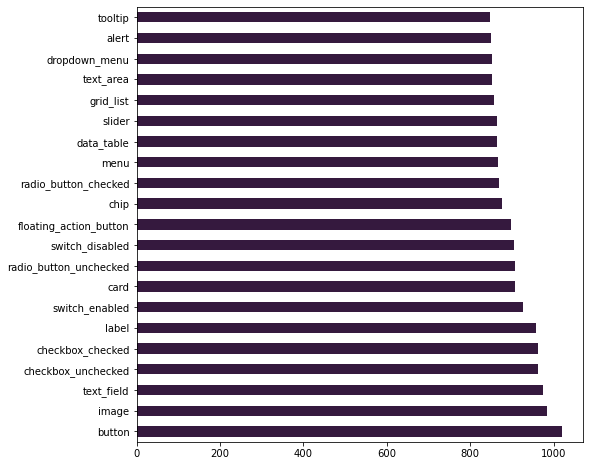

In [6]:
label_count.plot.barh();

In [7]:
medium_count = df.medium.value_counts()
medium_count.to_frame()

,medium
digital,13495
paper,5505


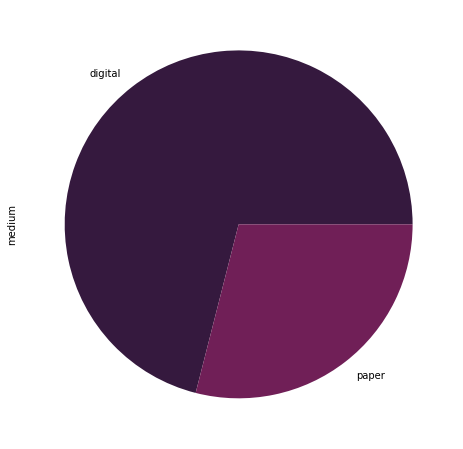

In [8]:
medium_count.plot.pie();

In [9]:
device_count = df.device.value_counts()
device_count.to_frame()

,device
stylus,13276
pen,4015
pencil,1490
mouse,131
finger,65


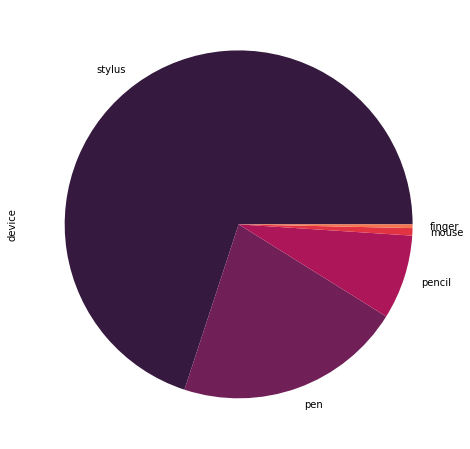

In [10]:
device_count.plot.pie();

In [11]:
image_path_with_labels = np.array([(path / filename, label) for filename, label, *_ in df.sample(9).values])
images = [ Image.open(image_path) for image_path in image_path_with_labels[:, 0]]
titles = image_path_with_labels[:, 1]

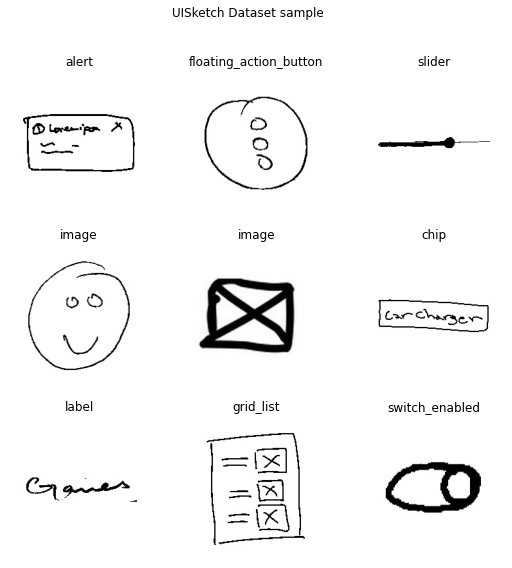

In [12]:
show_images(images, titles=titles, nrows=3, ncols=3, suptitle="UISketch Dataset sample")